In [3]:
%cd ..

/Users/mateoibarguen/Desktop/DATA-Capstone


In [5]:
from models.networks.lstm_models import *
from models.spectra_preprocessor import *
from models.run_train import *
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
dataset_name = "example_set"

In [7]:
spectra_pp = SpectraPreprocessor(dataset_name, num_channels=2, 
                                 num_instances=200, use_generator=False)

In [11]:
spectra_pp_other = SpectraPreprocessor("example_set_03", num_channels=2, 
                                 num_instances=200, use_generator=False)

In [9]:
spectra_pp.train_spectra_loader.get_dm()[0]

[[0.09651028115942346,
  0.10755126552783341,
  0.15643050986525364,
  0.12023792301417018,
  0.1432457001816703,
  0.15342368395276107,
  0.16797193376464625,
  0.17401341292494382,
  0.16187502567205786,
  0.1522573819140904,
  0.16927339187890195,
  0.14959531273815344,
  0.18429988502004566,
  0.19459168731424736,
  0.18187385232691652,
  0.21080137087730305,
  0.18376070519103455,
  0.20918006783248552,
  0.21192245858243536,
  0.21810502381107774,
  0.2422396581082607,
  0.20141588929201484,
  0.22906727747258857,
  0.23759526705393053,
  0.21807963561771135,
  0.24477204572339675,
  0.22797207874289446,
  0.2683760842247391,
  0.25222204975809853,
  0.27291563932638796,
  0.2713338317072229,
  0.28461716406445736,
  0.27819122575174066,
  0.30028436768045785,
  0.27091821086088286,
  0.2761195344107732,
  0.26011241456693335,
  0.2992412572263343,
  0.30078717769942254,
  0.2939107512494062,
  0.28801668060007785,
  0.3153326909962196,
  0.2751198668115221,
  0.29799070691115287

In [12]:
spectra_pp_other.train_spectra_loader.get_dm()[0]

[[0.014995282365229668,
  0.044665661656514546,
  0.018720030045457612,
  0.02868059006508126,
  0.0,
  0.019830284555475988,
  0.039854515692534044,
  0.03619895156623336,
  0.03216367148861951,
  0.04731938197653738,
  0.04229437868460566,
  0.03692420109196628,
  0.06079057259073707,
  0.06055551427393142,
  0.03339541363882911,
  0.06110760814388794,
  0.03506479529202717,
  0.03418043794384996,
  0.03150381269141298,
  0.070336866808603,
  0.028371966813799433,
  0.06459270722919774,
  0.07875967046370679,
  0.030973521740719785,
  0.07465669238559636,
  0.0696232196542685,
  0.04310444711010296,
  0.06623352199136424,
  0.053127028406087684,
  0.0881815301713074,
  0.04914936105730641,
  0.05632824235329748,
  0.07877701043852002,
  0.06566806623435294,
  0.07713389965143443,
  0.09624522455411257,
  0.10189040616102932,
  0.09735326255004007,
  0.08765868645616923,
  0.1120289509447453,
  0.09433788653020235,
  0.11242031119175636,
  0.11908680527307476,
  0.0771903670387167,
  

### Issue with the data

In [194]:
num_instances = 2
num_channels = 3

In [137]:
dm_reshaped = np.array(dm[:num_instances])[:, :num_channels, :]

In [184]:
#np.array(dm_reshaped).shape

In [204]:
original_nc = 5
additional_nc =1

In [205]:
dm = np.array(spectra_pp.train_spectra_loader.get_dm()[:num_instances])[:, :original_nc, :]
dm_padded = pad(dm, additional_nc)
dm_reshaped = dm_padded.reshape(dm_padded.shape[0], dm_padded.shape[2], dm_padded.shape[1])

In [202]:
pad(dm, 1).shape

(2, 6, 301)

In [13]:
def pad(X, additional_nc, pad_mode):
    """
    constant default is 0.
    """
    
    return np.pad(X, ((0, 0), (0, additional_nc), (0, 0)), pad_mode)

In [27]:
def evaluate_model_padded(dataset_name, model, original_nc, target_nc, pad_mode, num_instances=200):
    
    spectra_pp = SpectraPreprocessor(dataset_name=dataset_name, num_channels=original_nc,
                                     num_instances=num_instances, use_generator=False)
    
    X_train, y_train = spectra_pp.transform_train()
    additional_nc = target_nc - original_nc
    dm = np.array(spectra_pp.train_spectra_loader.get_dm()[:num_instances])[:, :original_nc, :]
    
    dm_padded = pad(dm, additional_nc, pad_mode)
    dm_reshaped = dm_padded.reshape(dm_padded.shape[0], dm_padded.shape[2], dm_padded.shape[1])

    eval_results = model.evaluate(dm_reshaped, y_train)
    
    eval_metrics = eval_results['metrics_names']
    eval_scores = eval_results['metrics']
    eval_dict = {metric_name: score for metric_name, score in zip(eval_metrics, eval_scores)}
    eval_dict.update({'original_nc': original_nc, 'pad_mode': pad_mode})
    return eval_dict


In [244]:
evaluate_model_padded('example_set_03', model, original_nc=10, target_nc=50, pad_mode="constant")

100/100 [==============================] - 1s 6ms/sample - loss: 9.7268 - accuracy: 0.2900 - mae: 0.3583 - mse: 0.3156


{'loss': 9.726761741638184,
 'accuracy': 0.28999999165534973,
 'mae': 0.35834312438964844,
 'mse': 0.31556278467178345,
 'original_nc': 10,
 'pad_mode': 'constant'}

In [222]:
padded_nc_metrics = [evaluate_model_padded(dataset_name, model, original_nc=i, target_nc=50, ) for i in range(1, 3)]

100/100 [==============================] - 1s 6ms/sample - loss: 5.4661 - accuracy: 0.4400 - mae: 0.2752 - mse: 0.2484


In [28]:
def get_pad_metrics(dataset_name, model, lower_original_nc, upper_original_nc, target_nc, pad_mode, num_instances=200):
    padded_nc_metrics = [evaluate_model_padded(dataset_name, model, original_nc=i, target_nc=target_nc, pad_mode=pad_mode) 
                         for i in range(lower_original_nc, upper_original_nc)]
    return pd.DataFrame(padded_nc_metrics)

In [29]:
dataset_name = 'example_set'

pad_metrics_df = get_pad_metrics(dataset_name, model, 
                                 lower_original_nc=1, upper_original_nc=50, 
                                 target_nc=50, pad_mode="symmetric")

pad_metrics_df_reflective = get_pad_metrics(dataset_name, model, 
                                 lower_original_nc=1, upper_original_nc=50, 
                                 target_nc=50, pad_mode="reflect")

pad_metrics_df_constant = get_pad_metrics(dataset_name, model, 
                                 lower_original_nc=1, upper_original_nc=50, 
                                 target_nc=50, pad_mode="constant")

pad_df = pd.concat([pad_metrics_df_reflective, pad_metrics_df, pad_metrics_df_constant])
pad_df

200/200 [==============================] - 2s 8ms/sample - loss: 0.7610 - accuracy: 0.8350 - mae: 0.0944 - mse: 0.0748


200/200 [==============================] - 3s 15ms/sample - loss: 2.1427 - accuracy: 0.7750 - mae: 0.1135 - mse: 0.1085


200/200 [==============================] - 2s 11ms/sample - loss: 0.5942 - accuracy: 0.8650 - mae: 0.0715 - mse: 0.0577


,accuracy,loss,mae,mse,original_nc,pad_mode
0,0.290,15.354943,0.356591,0.350778,1,reflect
1,0.525,5.343721,0.237916,0.218031,2,reflect
2,0.550,3.965372,0.226345,0.205514,3,reflect
3,0.610,2.902575,0.193879,0.174932,4,reflect
4,0.615,2.172999,0.191950,0.165564,5,reflect
5,0.715,1.754393,0.147151,0.129406,6,reflect
6,0.685,1.554972,0.153999,0.132118,7,reflect
7,0.715,1.467450,0.141971,0.120618,8,reflect
8,0.725,1.357691,0.139640,0.117902,9,reflect
9,0.785,1.074295,0.114797,0.096967,10,reflect


In [30]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

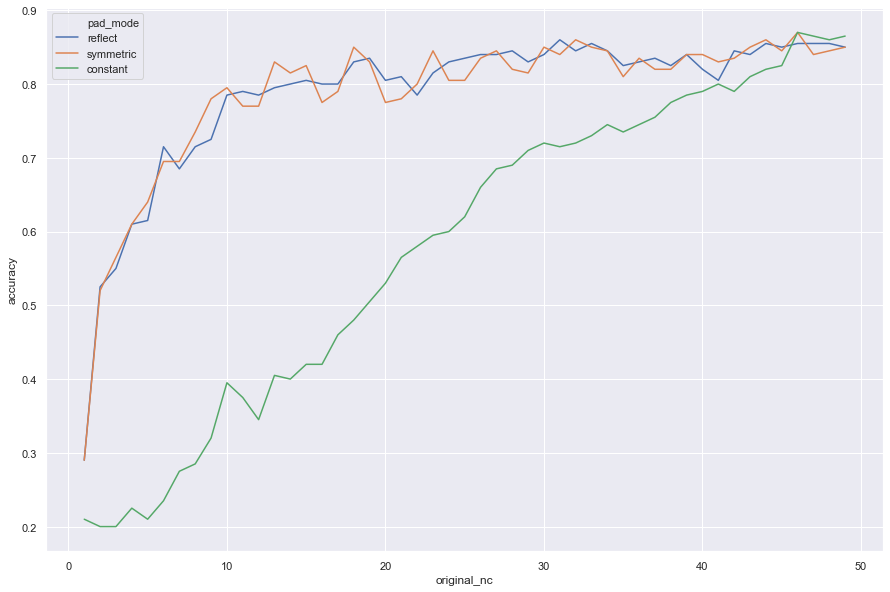

In [31]:
plt.figure(figsize=(15, 10))

ax = sns.lineplot(x='original_nc', y='accuracy', data=pad_df, hue='pad_mode')
plt.show()

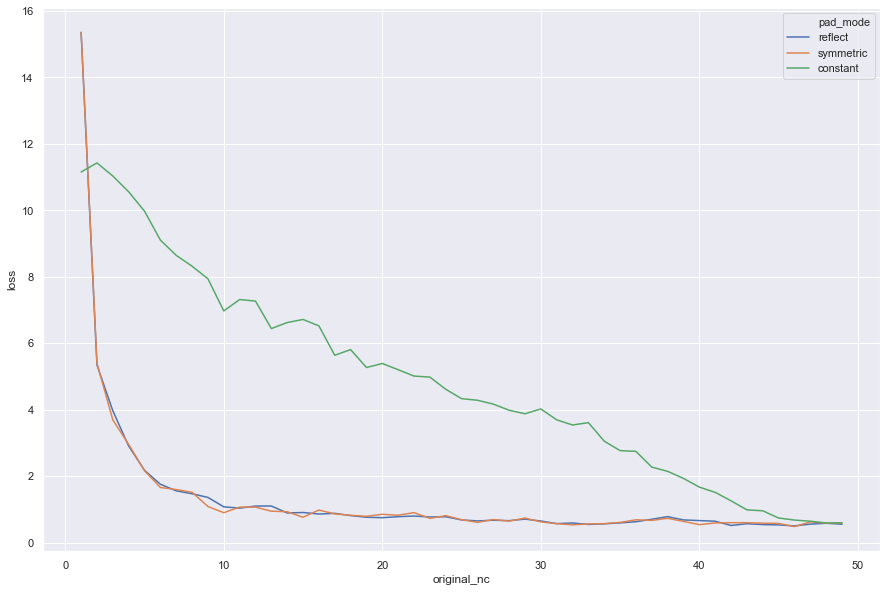

In [32]:
plt.figure(figsize=(15, 10))

ax = sns.lineplot(x='original_nc', y='loss', data=pad_df, hue='pad_mode')
plt.show()

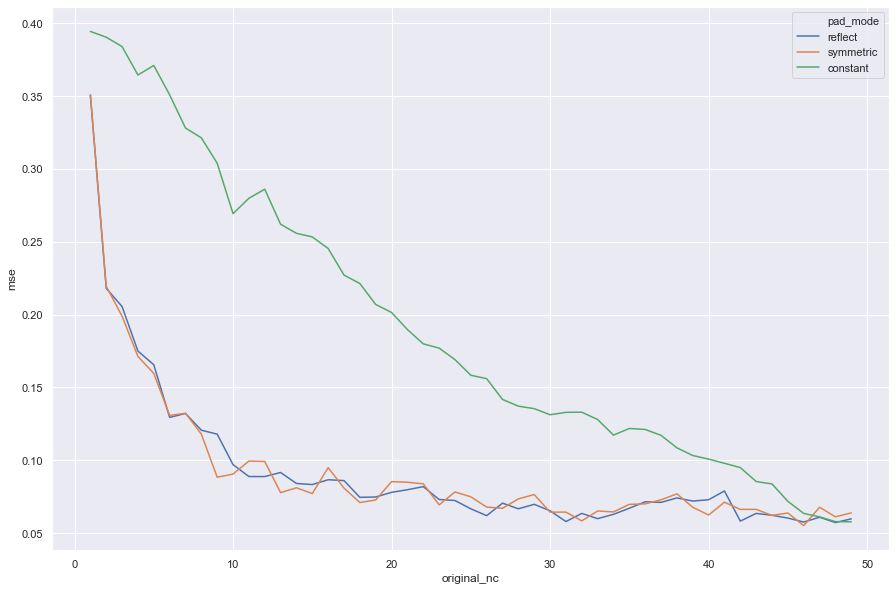

In [34]:
plt.figure(figsize=(15, 10))

ax = sns.lineplot(x='original_nc', y='mse', data=pad_df, hue='pad_mode')
plt.show()

In [273]:
pad_metrics_df_test = get_pad_metrics(dataset_name, model, 
                                 lower_original_nc=1, upper_original_nc=50, 
                                 target_nc=50, pad_mode="symmetric")

pad_metrics_df_reflective_test = get_pad_metrics(dataset_name, model, 
                                 lower_original_nc=1, upper_original_nc=50, 
                                 target_nc=50, pad_mode="reflect")

pad_metrics_df_constant_test = get_pad_metrics(dataset_name, model, 
                                 lower_original_nc=1, upper_original_nc=50, 
                                 target_nc=50, pad_mode="constant")

pad_df_test = pd.concat([pad_metrics_df_reflective_test, pad_metrics_df_test, pad_metrics_df_constant_test])
pad_df_test

75/75 [==============================] - 1s 8ms/sample - loss: 1.5789 - accuracy: 0.7467 - mae: 0.1216 - mse: 0.1132


75/75 [==============================] - 1s 9ms/sample - loss: 0.0311 - accuracy: 1.0000 - mae: 0.0139 - mse: 0.0027


,accuracy,loss,mae,mse,original_nc,pad_mode
0,0.20,20.603199,0.399996,0.398211,1,reflect
1,0.44,5.466110,0.275193,0.248444,2,reflect
2,0.55,3.671391,0.235913,0.210530,3,reflect
3,0.58,3.325098,0.208088,0.188749,4,reflect
4,0.67,2.298185,0.166143,0.145613,5,reflect
5,0.67,1.738949,0.159831,0.137866,6,reflect
6,0.70,1.733287,0.159244,0.136049,7,reflect
7,0.69,1.497659,0.149125,0.124969,8,reflect
8,0.70,1.655199,0.147072,0.130880,9,reflect
9,0.71,1.270788,0.140488,0.121237,10,reflect


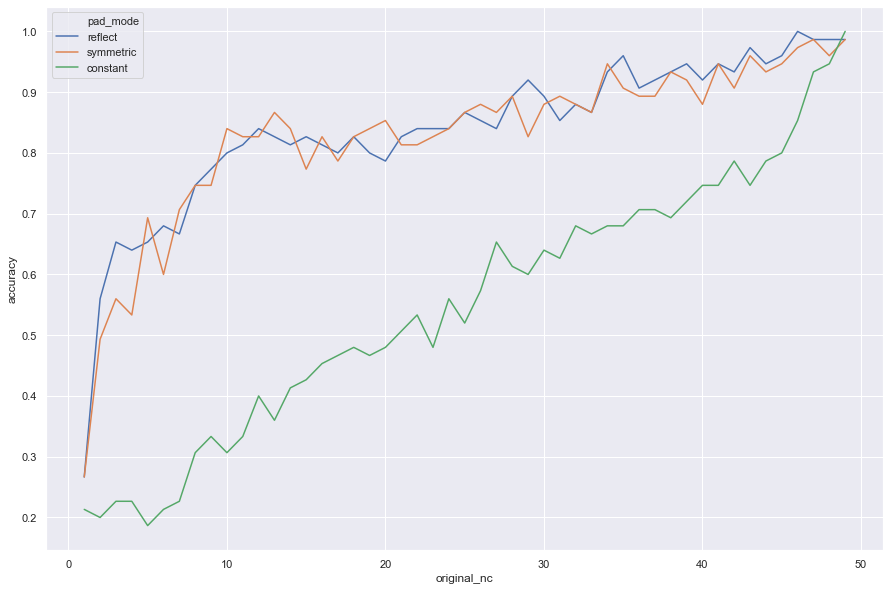

In [274]:
plt.figure(figsize=(15, 10))

ax = sns.lineplot(x='original_nc', y='accuracy', data=pad_df_test, hue='pad_mode')
plt.show()

In [19]:
dataset_name = "set_nc50_ns20k_v2"
dataset_config, model = initialize_model(dataset_name=dataset_name, model_name="GoogleModel", model_module_index=3, num_channels=50, num_instances=100)
model.persist("GoogleModel_BC-1234-50c-all.0513.2202")

model_module_index:  3
loaded_modules:  [(<module 'models.networks.abstract_models' from '/Users/mateoibarguen/Desktop/DATA-Capstone/models/networks/abstract_models/__init__.py'>, 'models.networks.abstract_models'), (<module 'models.networks.ensemble_models' from '/Users/mateoibarguen/Desktop/DATA-Capstone/models/networks/ensemble_models.py'>, 'models.networks.ensemble_models'), (<module 'models.networks.evaluator' from '/Users/mateoibarguen/Desktop/DATA-Capstone/models/networks/evaluator.py'>, 'models.networks.evaluator'), (<module 'models.networks.lstm_models' from '/Users/mateoibarguen/Desktop/DATA-Capstone/models/networks/lstm_models.py'>, 'models.networks.lstm_models')]
Using default parameters: {'conv_1': 16, 'conv_2': 32, 'bi_1': 128, 'bi_2': 128, 'drop_1': 0.01, 'dense_1': 64, 'drop_2': 0.05}
